## DA6401 Assignment 1
#### Achyutha M. - PH21B004

In [1]:
import wandb

from utils.neural_network import NeuralNetwork, nn_from_config
# from utils.wandb_helper import WandbTrainer, WandbCallback, log_images
from utils import wandb_helper
from utils import helper_functions
from utils import neural_network

In [2]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: bullseye2608 (bullseye2608-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

### Question 1

In [3]:
# Load data
X_train, y_train, X_val, y_val, X_test, y_test = helper_functions.load_data('fashion_mnist')

# Log image examples to wandb
wandb_helper.log_images(X_train, y_train)


### Question 2

In [ ]:
# Implemented and initialised the class NeuralNetwork
nn = neural_network.NeuralNetwork(
    layer_sizes=[784, 64, 64, 10],
    activation_functions=['relu', 'relu', 'softmax'],
    weight_decay=0.0,
    weight_init='xavier',
)

# Testing initialised model
y_init_pred = nn.forward_propagation(X_train)[0][-1]
init_accuracy = nn.compute_accuracy_from_predictions(y_init_pred, y_train)

print(f"Accuracy of Neural Network before training: {init_accuracy :<f}")

Accuracy of Neural Network before training: 0.188611


### Question 3

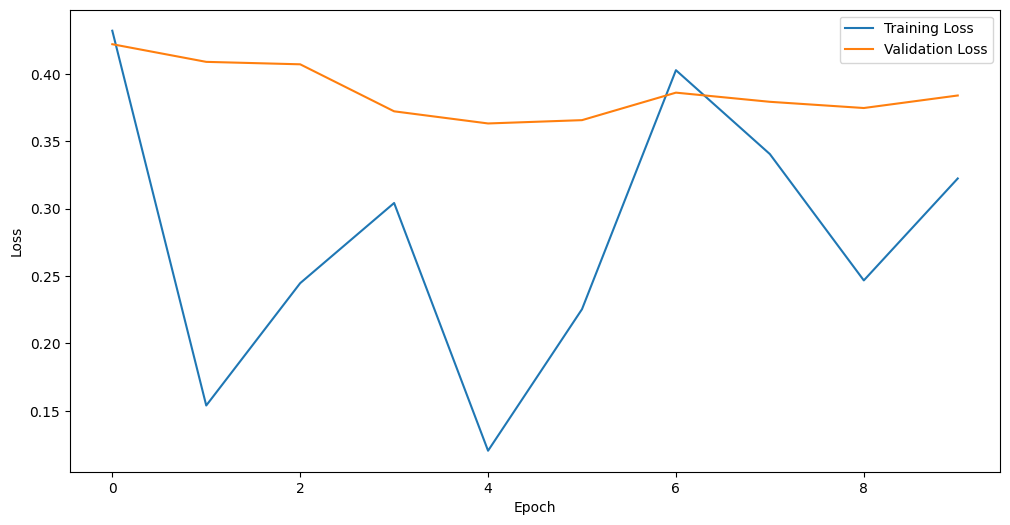

In [29]:
# Training the model
optimizer = {
    'name': 'adam',
    'learning_rate': 0.01,
    'beta1': 0.9,
    'beta2': 0.999,
    'epsilon': 1e-8
}

nn.set_optimizer(optimizer_dict=optimizer)

history = nn.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_val,
    y_val=y_val,
    batch_size=64,
    num_epochs=10,
    loss_type='cross_entropy',
)

nn.plot_history(history)

In [30]:
nn.compute_accuracy(X_val, y_val)

np.float64(0.8653333333333333)